Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 
Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score,classification_report,plot_roc_curve

from scipy.stats import zscore
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE



In [2]:
from imblearn.pipeline import Pipeline, make_pipeline

In [3]:
#df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [4]:
#df.to_csv("insurance_fraud.csv")

In [5]:
df=pd.read_csv("insurance_fraud.csv",index_col="Unnamed: 0")

In [6]:
pd.set_option('display.max_columns',None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [7]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

we want to predict whether  fraud_reported is yes or no.
So this is a classification algorithm

In [8]:
df.shape

(1000, 40)

(1000, 40) is the size of the dataset

In [9]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

dropping _c39 as it is has all 0s and seems to be a dummy column

In [11]:
df.drop("_c39",axis=1,inplace=True)

In [12]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

There is no missing data in any feature

## EDA

In [13]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

the dataset is highly imbalances with more records having fraud_reported as No

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

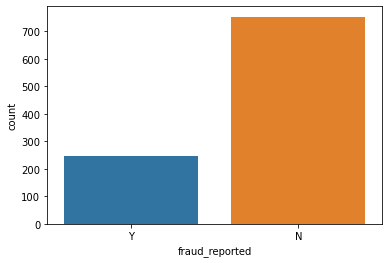

In [14]:
sns.countplot(df['fraud_reported'])

In [15]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [16]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','insured_zip','incident_location','incident_date',
           'insured_hobbies','auto_make','auto_model','policy_state','incident_state','incident_city']

df.drop(to_drop, inplace = True, axis = 1)

In [17]:
df.nunique()

months_as_customer             391
age                             46
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_available          3
total_claim_amount             763
injury_claim                   638
property_claim                 626
vehicle_claim                  726
auto_year                       21
fraud_reported                   2
dtype: int64

In [18]:
df.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported'],
      dtype='object')

In [19]:
numerCol=[]
for column in df.columns:
    if df[column].dtype!='object':
        numerCol.append(column)

In [20]:
numerCol

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [21]:
catCol=[]
for column in df.columns:
    if df[column].dtype=='object':
        catCol.append(column)

In [22]:
catCol

['policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'property_damage',
 'police_report_available',
 'fraud_reported']

In [23]:
len(numerCol)+len(catCol)

28

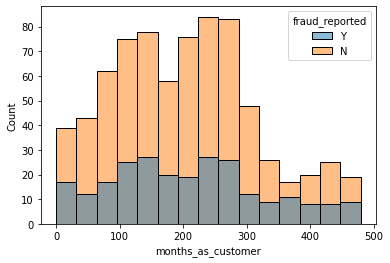

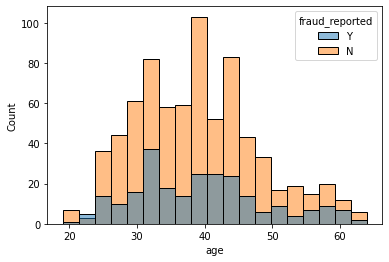

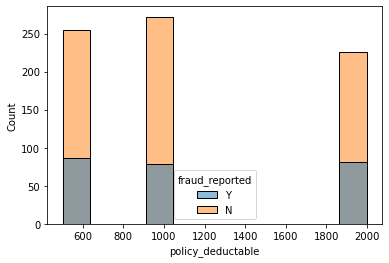

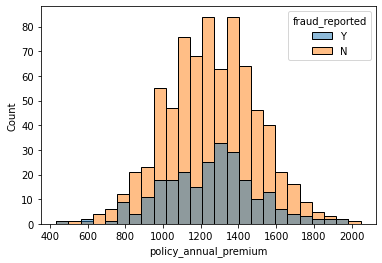

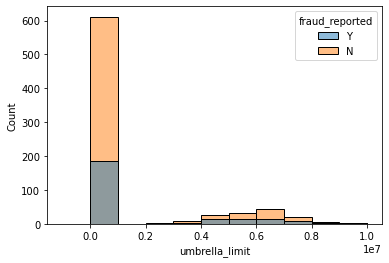

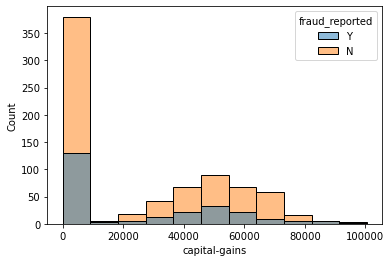

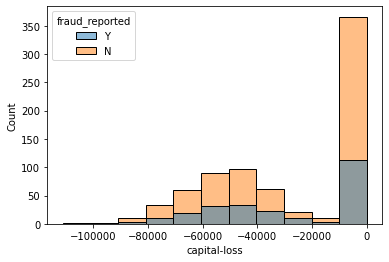

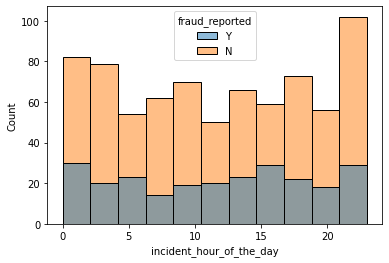

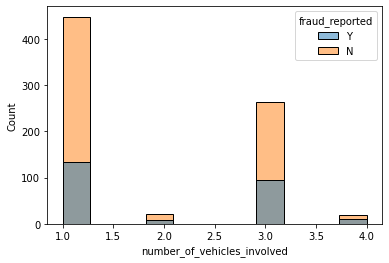

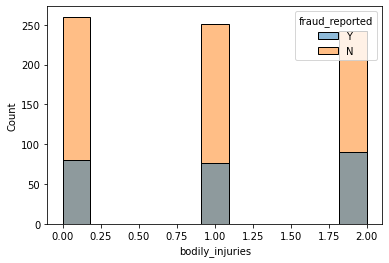

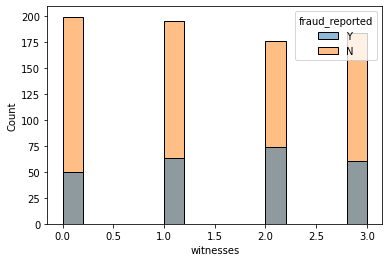

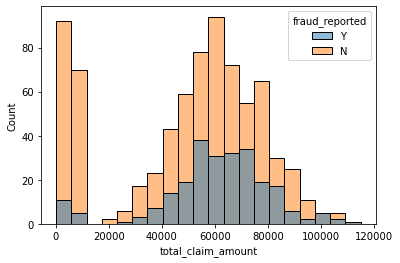

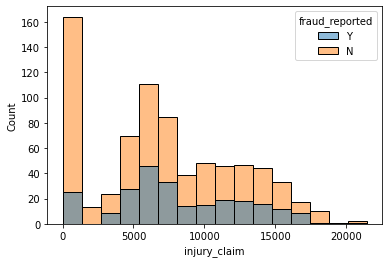

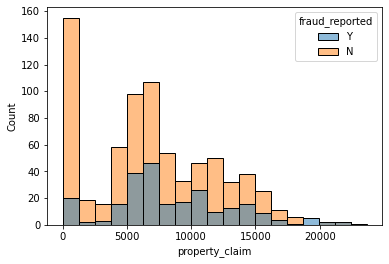

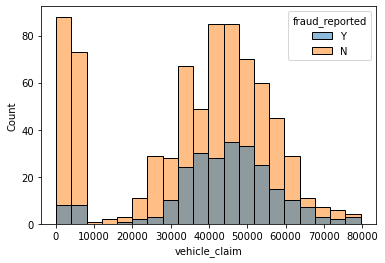

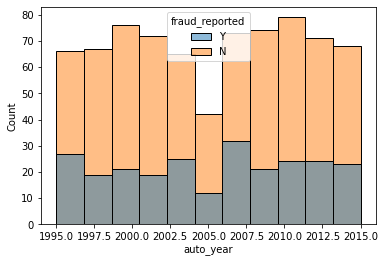

In [24]:
for col in numerCol:
    #print(df.groupby(col)['fraud_reported'].value_counts())
    sns.histplot(x=col,data=df,hue='fraud_reported')
    plt.show()

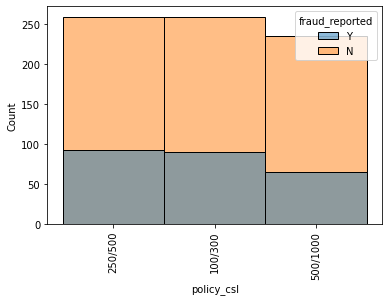

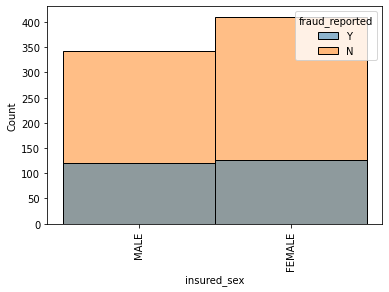

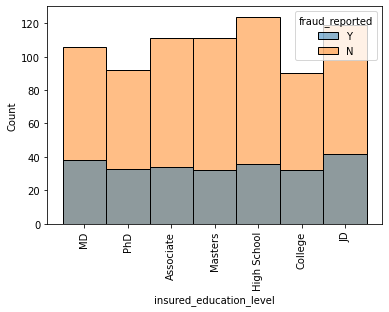

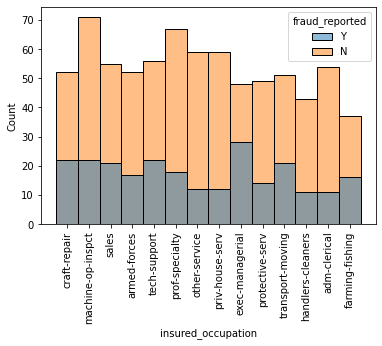

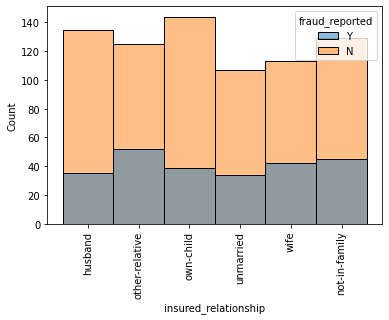

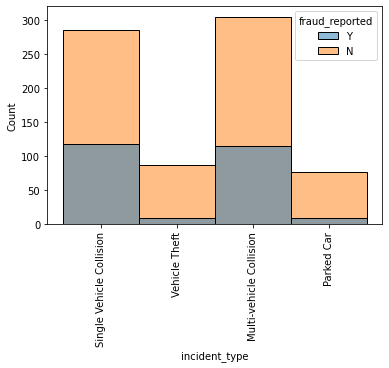

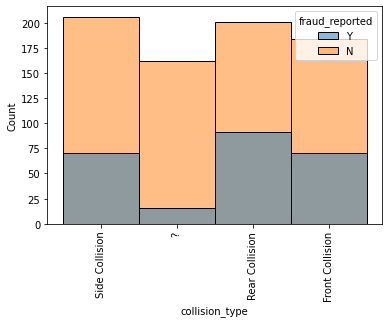

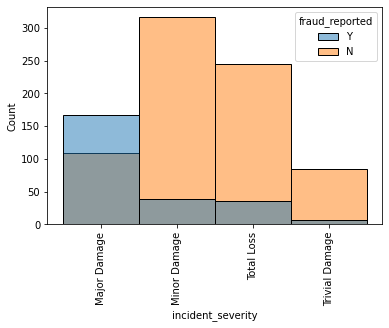

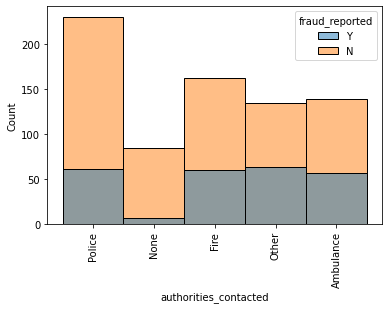

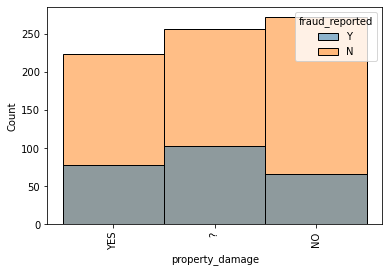

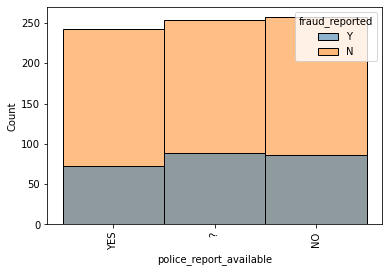

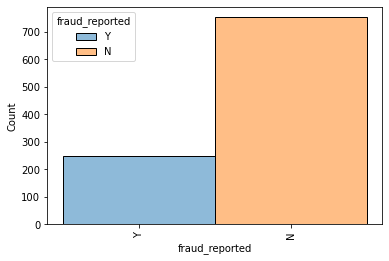

In [25]:
for col in catCol:
    #print(df.groupby(col)['fraud_reported'].value_counts())
    sns.histplot(x=col,data=df,hue='fraud_reported')
    plt.xticks(rotation=90)
    plt.show()
    

In [26]:
for col in catCol:
    print("="*10+col+"="*10)
    print(df[col].value_counts())
    #sns.histplot(x=col,data=df,hue='fraud_reported')
    #plt.xticks(rotation=90)
    
    #plt.show()

==========policy_csl==========
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
==========insured_sex==========
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
==========insured_education_level==========
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
==========insured_occupation==========
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
==========insured_relationship==========
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried   

There are some value with ? so replacing them with mode values of that feature

In [27]:
df.replace('?', np.nan, inplace = True)

In [28]:
df.isnull().sum()>0

months_as_customer             False
age                            False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                 True
bodily_injuries                False
witnesses                      False
police_report_available         True
total_claim_amount             False
injury_claim                   False
property_claim                 False
vehicle_claim                  False
auto_year                      False
f

In [29]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [30]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [31]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [32]:
for col in catCol:
    print("="*10+col+"="*10)
    print(df[col].value_counts())
    #sns.histplot(x=col,data=df,hue='fraud_reported')
    #plt.xticks(rotation=90)
    
    #plt.show()

==========policy_csl==========
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
==========insured_sex==========
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
==========insured_education_level==========
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
==========insured_occupation==========
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
==========insured_relationship==========
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried   

In [33]:
cat_df = pd.get_dummies(df[catCol], drop_first = True)

In [34]:
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,fraud_reported_Y
0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1
1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0


In [35]:
cat_df.shape

(1000, 42)

In [36]:
df[numerCol].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   capital-gains                1000 non-null   int64  
 6   capital-loss                 1000 non-null   int64  
 7   incident_hour_of_the_day     1000 non-null   int64  
 8   number_of_vehicles_involved  1000 non-null   int64  
 9   bodily_injuries              1000 non-null   int64  
 10  witnesses                    1000 non-null   int64  
 11  total_claim_amount           1000 non-null   int64  
 12  injury_claim                 1000 non-null   int64  
 13  property_claim     

In [37]:
df1 = pd.concat([df[numerCol], cat_df], axis = 1)

In [38]:
df1.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,fraud_reported_Y
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,2007,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,2007,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0


In [39]:
df1[numerCol].head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,2009


<AxesSubplot:>

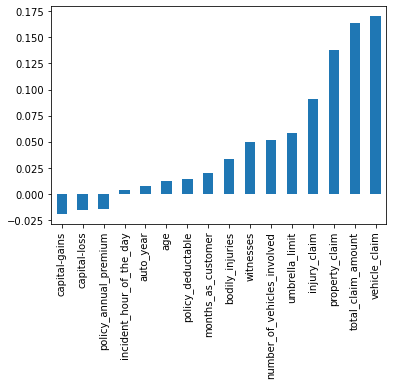

In [40]:
df1[numerCol+['fraud_reported_Y']].corr()['fraud_reported_Y'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

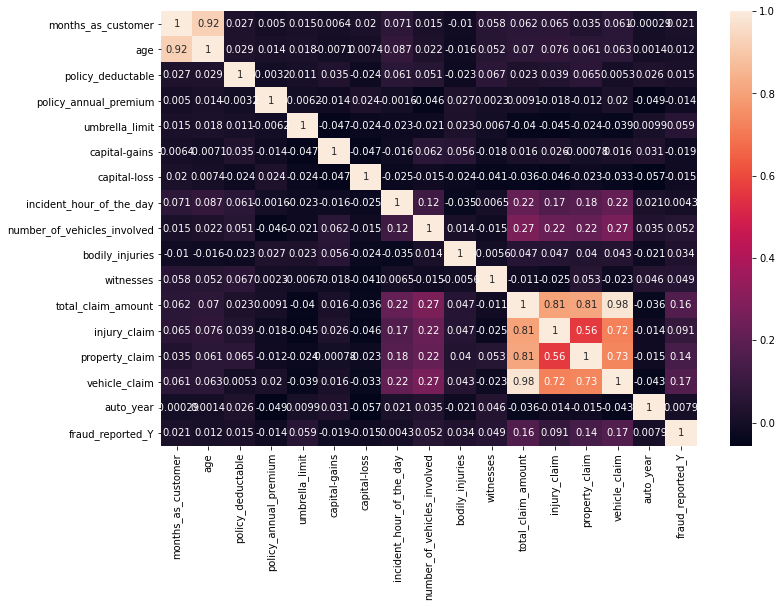

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df1[numerCol+['fraud_reported_Y']].corr(),annot=True)

From the above plot, we can see that there is high correlation between age and months_as_customer.We will drop the "Age" column. Also there is high correlation between total_clam_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others. So we will drop the total claim column.

In [42]:
df1.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [43]:
X=df1.drop('fraud_reported_Y',axis=1)
y=df1['fraud_reported_Y']

In [44]:
X.shape

(1000, 55)

# Applying different machine learning models now

## identifying the best random state

In [45]:
max_accu=0
maxRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    pred=dt.predict(X_test)
    accurac=accuracy_score(y_test,pred)
    #print(accurac*100,"at random state",i)
    if(accurac>max_accu):
        max_accu=accurac
        maxRS=i
        
print("best accuracy is",max_accu,"on random state",maxRS)

best accuracy is 0.7909090909090909 on random state 144


best accuracy is 0.7909090909090909 on random state 144


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=144)

**TASK: Scale the X train and X test data.**

oversampling the triaing set, after the split of data into training and validation set

In [47]:
y_train.value_counts()

0    508
1    162
Name: fraud_reported_Y, dtype: int64

In [48]:
smt=SMOTE()
X_resample,y_resample=smt.fit_resample(X_train,y_train)

In [49]:
y_resample.value_counts()

0    508
1    508
Name: fraud_reported_Y, dtype: int64

In [50]:
X_resample.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,149,500,1415.68,0,0,0,17,1,0,1,10800,5400,48600,1999,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1
1,289,2000,1102.29,0,73000,-37900,15,1,1,0,6000,6000,42000,1996,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,37,500,1969.63,0,0,0,21,3,1,1,6950,13900,55600,1995,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1
3,211,1000,1575.86,0,0,0,3,1,1,1,580,290,2320,2004,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0
4,163,1000,1503.21,0,55700,-49900,1,1,2,1,5710,11420,34260,2013,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0


In [51]:
scaler = StandardScaler()

In [52]:
scaled_X_train = scaler.fit_transform(X_resample)
scaled_X_test = scaler.transform(X_test)

In [53]:
DTC=DecisionTreeClassifier()
DTC.fit(scaled_X_train,y_resample)
pred=DTC.predict(scaled_X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.84      0.81      0.82       245
           1       0.50      0.54      0.52        85

    accuracy                           0.74       330
   macro avg       0.67      0.68      0.67       330
weighted avg       0.75      0.74      0.75       330



In [54]:
RFC=RandomForestClassifier()
RFC.fit(scaled_X_train,y_resample)
pred=RFC.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       245
           1       0.62      0.42      0.50        85

    accuracy                           0.78       330
   macro avg       0.72      0.67      0.68       330
weighted avg       0.77      0.78      0.77       330



In [55]:
svc=SVC()
svc.fit(scaled_X_train,y_resample)
pred=svc.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       245
           1       0.71      0.18      0.28        85

    accuracy                           0.77       330
   macro avg       0.74      0.58      0.57       330
weighted avg       0.76      0.77      0.71       330



In [56]:
ada=AdaBoostClassifier()
ada.fit(scaled_X_train,y_resample)
pred=ada.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       245
           1       0.55      0.48      0.51        85

    accuracy                           0.76       330
   macro avg       0.69      0.67      0.68       330
weighted avg       0.76      0.76      0.76       330



In [57]:
dtcAC=0.74
rfcAC=0.78
svcAC=0.77
adaAC=0.76

### now checking cross val score

In [58]:
imba_pipeline=make_pipeline(SMOTE(random_state=42),scaler,DTC)
DTCcv=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
DTCcv

0.7044776119402985

In [59]:
imba_pipeline=make_pipeline(SMOTE(random_state=42),scaler,RFC)
RFCcv=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
RFCcv

0.7626865671641792

In [60]:
imba_pipeline=make_pipeline(SMOTE(random_state=42),scaler,svc)
svcCV=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
svcCV

0.7552238805970151

In [61]:
imba_pipeline=make_pipeline(SMOTE(random_state=42),scaler,ada)
adaCV=cross_val_score(imba_pipeline,X_train,y_train,cv=5).mean()
adaCV

0.753731343283582

In [62]:
print(dtcAC-DTCcv)
print(rfcAC-RFCcv)
print(svcAC-svcCV)
print(adaAC-adaCV)

0.09552238805970159
0.08731343283582083
0.0847761194029849
0.08626865671641792


Based on f1scores choosing Dtc as best method for hyperParameter tuning

## HyperParameterTuning

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
pipeLine=Pipeline([('smote',SMOTE(random_state=42)),('scaler',StandardScaler()),('dtc',DecisionTreeClassifier())])

In [72]:
param_grid = {'dtc__criterion':['gini','entropy'],'dtc__min_samples_split':[2,3],'dtc__min_impurity_decrease':[0,0.01],
             'dtc__min_samples_leaf':[1,3]}
grid = GridSearchCV(pipeLine,param_grid,verbose=2)

In [73]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END dtc__criterion=gini, dtc__min_impurity_decrease=0, dtc__min_samples_leaf=1, dtc__min_samples_split=2; total time=   0.0s
[CV] END dtc__criterion=gini, dtc__min_impurity_decrease=0, dtc__min_samples_leaf=1, dtc__min_samples_split=2; total time=   0.0s
[CV] END dtc__criterion=gini, dtc__min_impurity_decrease=0, dtc__min_samples_leaf=1, dtc__min_samples_split=2; total time=   0.0s
[CV] END dtc__criterion=gini, dtc__min_impurity_decrease=0, dtc__min_samples_leaf=1, dtc__min_samples_split=2; total time=   0.0s
[CV] END dtc__criterion=gini, dtc__min_impurity_decrease=0, dtc__min_samples_leaf=1, dtc__min_samples_split=2; total time=   0.0s
[CV] END dtc__criterion=gini, dtc__min_impurity_decrease=0, dtc__min_samples_leaf=1, dtc__min_samples_split=3; total time=   0.0s
[CV] END dtc__criterion=gini, dtc__min_impurity_decrease=0, dtc__min_samples_leaf=1, dtc__min_samples_split=3; total time=   0.0s
[CV] END dtc__criterion=gini,

[CV] END dtc__criterion=entropy, dtc__min_impurity_decrease=0.01, dtc__min_samples_leaf=1, dtc__min_samples_split=2; total time=   0.0s
[CV] END dtc__criterion=entropy, dtc__min_impurity_decrease=0.01, dtc__min_samples_leaf=1, dtc__min_samples_split=2; total time=   0.0s
[CV] END dtc__criterion=entropy, dtc__min_impurity_decrease=0.01, dtc__min_samples_leaf=1, dtc__min_samples_split=3; total time=   0.0s
[CV] END dtc__criterion=entropy, dtc__min_impurity_decrease=0.01, dtc__min_samples_leaf=1, dtc__min_samples_split=3; total time=   0.0s
[CV] END dtc__criterion=entropy, dtc__min_impurity_decrease=0.01, dtc__min_samples_leaf=1, dtc__min_samples_split=3; total time=   0.0s
[CV] END dtc__criterion=entropy, dtc__min_impurity_decrease=0.01, dtc__min_samples_leaf=1, dtc__min_samples_split=3; total time=   0.0s
[CV] END dtc__criterion=entropy, dtc__min_impurity_decrease=0.01, dtc__min_samples_leaf=1, dtc__min_samples_split=3; total time=   0.0s
[CV] END dtc__criterion=entropy, dtc__min_impuri

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('scaler', StandardScaler()),
                                       ('dtc', DecisionTreeClassifier())]),
             param_grid={'dtc__criterion': ['gini', 'entropy'],
                         'dtc__min_impurity_decrease': [0, 0.01],
                         'dtc__min_samples_leaf': [1, 3],
                         'dtc__min_samples_split': [2, 3]},
             verbose=2)

In [74]:
grid.best_params_

{'dtc__criterion': 'gini',
 'dtc__min_impurity_decrease': 0.01,
 'dtc__min_samples_leaf': 1,
 'dtc__min_samples_split': 2}

In [75]:
grid.best_estimator_

Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('dtc', DecisionTreeClassifier(min_impurity_decrease=0.01))])

In [76]:
grid.best_score_

0.7850746268656715

In [77]:
pd.DataFrame(data=grid.cv_results_,columns=grid.cv_results_.keys())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dtc__criterion,param_dtc__min_impurity_decrease,param_dtc__min_samples_leaf,param_dtc__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.072007,0.014444,0.005590,0.001195,gini,0,1,2,"{'dtc__criterion': 'gini', 'dtc__min_impurity_...",0.723881,0.671642,0.738806,0.686567,0.679104,0.700000,0.026448,14
1,0.111701,0.058996,0.007587,0.001355,gini,0,1,3,"{'dtc__criterion': 'gini', 'dtc__min_impurity_...",0.708955,0.686567,0.753731,0.671642,0.679104,0.700000,0.029626,14
2,0.081449,0.007522,0.007533,0.001066,gini,0,3,2,"{'dtc__criterion': 'gini', 'dtc__min_impurity_...",0.731343,0.664179,0.746269,0.723881,0.671642,0.707463,0.033173,11
3,0.081973,0.006547,0.007191,0.001162,gini,0,3,3,"{'dtc__criterion': 'gini', 'dtc__min_impurity_...",0.723881,0.679104,0.761194,0.723881,0.701493,0.717910,0.027277,9
4,0.068024,0.007687,0.006777,0.001461,gini,0.01,1,2,"{'dtc__criterion': 'gini', 'dtc__min_impurity_...",0.768657,0.761194,0.813433,0.835821,0.746269,0.785075,0.033838,1
5,0.057823,0.010773,0.006582,0.001010,gini,0.01,1,3,"{'dtc__criterion': 'gini', 'dtc__min_impurity_...",0.768657,0.761194,0.813433,0.835821,0.746269,0.785075,0.033838,1
6,0.067980,0.008740,0.006995,0.001408,gini,0.01,3,2,"{'dtc__criterion': 'gini', 'dtc__min_impurity_...",0.768657,0.761194,0.813433,0.835821,0.746269,0.785075,0.033838,1
7,0.061641,0.008577,0.007901,0.001571,gini,0.01,3,3,"{'dtc__criterion': 'gini', 'dtc__min_impurity_...",0.768657,0.761194,0.813433,0.835821,0.746269,0.785075,0.033838,1
8,0.088819,0.008730,0.006681,0.001722,entropy,0,1,2,"{'dtc__criterion': 'entropy', 'dtc__min_impuri...",0.694030,0.626866,0.731343,0.694030,0.671642,0.683582,0.034231,16
9,0.085190,0.008737,0.006362,0.001605,entropy,0,1,3,"{'dtc__criterion': 'entropy', 'dtc__min_impuri...",0.716418,0.671642,0.738806,0.694030,0.708955,0.705970,0.022438,12


### Displaying the confusion matrix and classification report

In [78]:
from sklearn.metrics import confusion_matrix,classification_report

In [79]:
grid_pred = grid.predict(X_test)

In [80]:
confusion_matrix(y_test,grid_pred)

array([[213,  32],
       [ 23,  62]], dtype=int64)

In [81]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       245
           1       0.66      0.73      0.69        85

    accuracy                           0.83       330
   macro avg       0.78      0.80      0.79       330
weighted avg       0.84      0.83      0.84       330



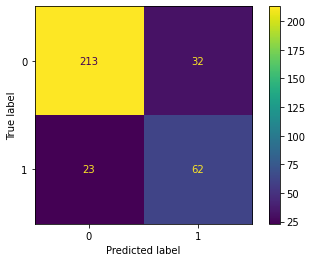

In [82]:
plot_confusion_matrix(grid,X_test,y_test)

outof 85 positive (fraud_Predicted_y=1) samples, 62 are being classified correctly and other 23 are classified wrong

outof 245 negative (fraud_Predicted_y=0) samples, 213 are being classified correct and other 32 are classified wrong

## Training with best params

In [ ]:
{'dtc__criterion': 'gini',
 'dtc__min_impurity_decrease': 0.01,
 'dtc__min_samples_leaf': 1,
 'dtc__min_samples_split': 2}

In [83]:
pipeLine=Pipeline([('smote',SMOTE(random_state=42)),('scaler',StandardScaler()),('dtc',DecisionTreeClassifier(criterion='gini',min_impurity_decrease=0.01,min_samples_leaf=1,min_samples_split=2))])

In [84]:
Final_model=pipeLine
Final_model.fit(X_train,y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('dtc', DecisionTreeClassifier(min_impurity_decrease=0.01))])

In [85]:

pred=Final_model.predict(X_test)
accuracyScore=accuracy_score(y_test,pred)
print(accuracyScore)

0.8333333333333334


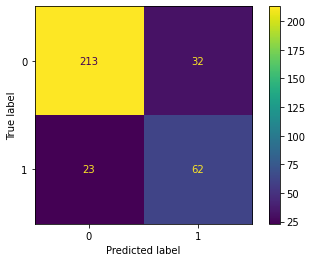

In [86]:
plot_confusion_matrix(Final_model,X_test,y_test)

final accuracy achieved is 84.4% with DecisionTreeClassifier

## plotting AUC ROC CURVE

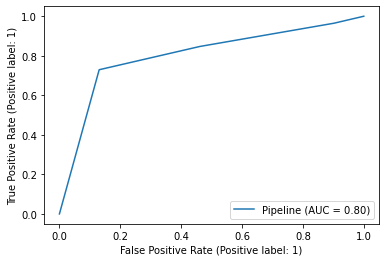

In [87]:
plot_roc_curve(Final_model,X_test,y_test)

AUC-ROC Curve area is 0.80 which is good.

## saving the model


In [88]:
import joblib
joblib.dump(Final_model,"InsuranceClaimFraud_Detection.pkl")

['InsuranceClaimFraud_Detection.pkl']